In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv("Advertising.csv")

In [31]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [32]:
X = df.drop('sales', axis = 1)

In [33]:
y = df['sales']

In [35]:
from sklearn.preprocessing import PolynomialFeatures

In [36]:
poly_features = PolynomialFeatures(degree = 2, include_bias = False)

In [37]:
poly_features.fit(X)

PolynomialFeatures(include_bias=False)

In [39]:
poly_transformed = poly_features.transform(X)

In [40]:
poly_transformed

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [41]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(poly_transformed, y, test_size = 0.3, random_state = 101)

In [48]:
from sklearn.linear_model import LinearRegression

array([[1.93200e+02, 1.84000e+01, 6.57000e+01, ..., 3.38560e+02,
        1.20888e+03, 4.31649e+03],
       [2.87600e+02, 4.30000e+01, 7.18000e+01, ..., 1.84900e+03,
        3.08740e+03, 5.15524e+03],
       [8.02000e+01, 0.00000e+00, 9.20000e+00, ..., 0.00000e+00,
        0.00000e+00, 8.46400e+01],
       ...,
       [2.39800e+02, 4.10000e+00, 3.69000e+01, ..., 1.68100e+01,
        1.51290e+02, 1.36161e+03],
       [2.14700e+02, 2.40000e+01, 4.00000e+00, ..., 5.76000e+02,
        9.60000e+01, 1.60000e+01],
       [1.63300e+02, 3.16000e+01, 5.29000e+01, ..., 9.98560e+02,
        1.67164e+03, 2.79841e+03]])

In [49]:
model = LinearRegression()

In [50]:
model.fit(X_train, y_train)

LinearRegression()

In [51]:
test_predictions = model.predict(X_test)

In [52]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

## Evaluating the regression

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [54]:
df['sales'].mean()

14.0225

In [61]:
MAE = mean_absolute_error(y_test, test_predictions)

In [67]:
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))

In [69]:
MAE, RMSE
# It is valid to compare to previous model only if the train test split is the same and 
# the random seed is same

(0.48967980448034976, 0.6646431757268904)

## Residual Plots

In [65]:
test_residuals = y_test - test_predictions

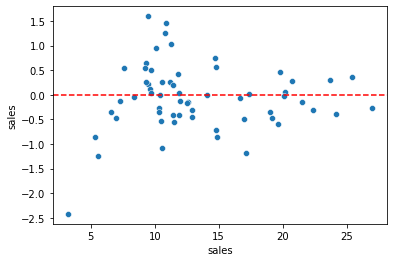

In [66]:
sns.scatterplot(x = y_test, y = test_residuals)
plt.axhline(y = 0, color = 'red', ls = '--')

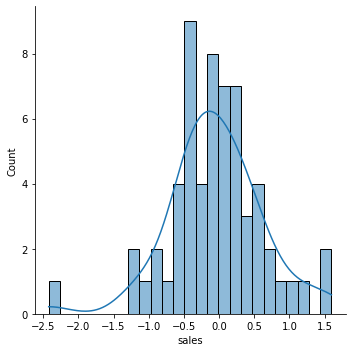

In [60]:
sns.displot(x = test_residuals, bins = 25, kde = True)

In [72]:
model.coef_ # Notice The interaction terms are quite synenergic i.e a definite relation 
# exists between these terms

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

## Choose a Proper degree for Polynomial Regression

In [75]:
# Create the different order polynomial
# Split poly feat train / test
# Fit on Train
# Store/Save the rmse for BOTH the train and test
# PLOT the results (error vs poly order)

In [77]:
train_rmse_errors = []
test_rmse_errors = [] 

for d in range(1, 10):
    poly_converter = PolynomialFeatures(degree = d, include_bias = False)
    poly_features = poly_converter.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.3, random_state = 101)

    model = LinearRegression()
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)


    

### Plot model complexity vs RMS Error to compare both the graphs

Text(0, 0.5, 'RMS Error')

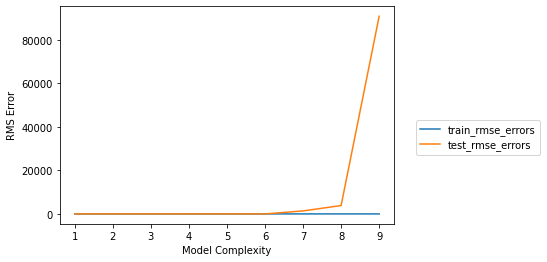

In [83]:
plt.plot(np.arange(1, 10), train_rmse_errors, label = 'train_rmse_errors')
plt.plot(np.arange(1, 10), test_rmse_errors, label = 'test_rmse_errors')
plt.legend(bbox_to_anchor = (1.05, 0.5))
plt.xlabel('Model Complexity')
plt.ylabel('RMS Error')

### Making the final Model
- It was observed that at degree = 3 model performs very well on the test data as well as the training data

In [97]:
final_poly_converter = PolynomialFeatures(degree = 3, include_bias = False)

In [98]:
final_model = LinearRegression()

In [99]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X, y)

LinearRegression()

### Dumping the converter and Model

In [100]:
from joblib import load, dump

In [101]:
dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [102]:
dump(final_poly_converter, 'final_converter.joblib')

['final_converter.joblib']

### Loading the model

In [103]:
loaded_converter = load('final_converter.joblib')

In [104]:
loaded_model = load('final_poly_model.joblib')

In [105]:
campaign = [[149, 22, 12]]

In [106]:
transformed_data = loaded_converter.fit_transform(campaign)

In [107]:
loaded_model.predict(transformed_data)

array([14.64501014])